# Préambule
Avant toute chose, veuillez renommer ce notebook en mettant vos Prénoms, Noms et numéro de groupe (à la place de la lettre X).
Tous les exercices sont indépendants, vous devez respecter impérativement les noms des fonctions et des variables, le nombre de variable qu'elles prennent en entrée et en sortie. Vos codes doivent être efficaces et simples. 
Il existe des fonctions python qui répondent exactement aux exercices (il existe une LU, des algorithmes d'optimisation, etc...) Il va de soi que nous n'évaluons par votre capacité à renommer une fonction python existante mais bien à programmer par vous même. Cependant, certaines fonctions comme `linspace` sont autorisées si on ne vous demande pas explicitement de les reprogrammer. <font color=red> Vos réponses doivent apparaître en rouge </font>

In [1]:
# METTEZ TOUS VOS IMPORTS ICI
import numpy as np
import matplotlib.pyplot as plt

# Exercice 1 : Optimisation (7 points)
On cherche à résoudre le problème suivant  :
$$
\min_{(x,y) \in \mathbb{R}^2} f(x,y) \text{ où } \quad f(x,y)=x^4+x^2\sin(y)+4y^2
$$

### Question I-1 : Calculez le gradient et la Hessienne de $f$

<font color=red> 
 $$\nabla f(x,y)=\begin{pmatrix} 4x^3+2x\sin(y)\\ x^2\cos(y)+8y\end{pmatrix}$$
    $$H[f](x,y)=\begin{pmatrix} 12 x^2+2\sin(y)&2x\cos(y)\\2x\cos(y)&-x^2\sin(y)+8\\\end{pmatrix}$$
</font>

### Question I-2 : implémentation de $f$, de son gradient et de sa Hessienne
Implémentez une fonction `f(M)` qui calcule la valeur de `f` au point `M` et qui rend un réel. Implémentez ensuite une fonction `gradf(M)` qui calcule la valeur du gradient de `f` au point `M`. Ce gradient est un tableau numpy de taille `2`. Implémentez finalement une fonction `Hessf(M)` qui rend la Hessienne de `f` au  point `M`. La Hessienne doit aussi être un tableau numpy.

In [2]:
def f(X) :
    return X[0]**4+X[0]**2*np.sin(X[1])+4*X[1]**2
def gradf(X) :
    grad=np.zeros(2)
    grad[0]=4*X[0]**3+2*X[0]*np.sin(X[1])
    grad[1]=X[0]**2*np.cos(X[1])+8*X[1]
    return grad
def Hessf(X) :
    hess=np.zeros((2,2))
    hess[0,0]=12*X[0]**2+2*np.sin(X[1])
    hess[1,1]=-X[0]**2*np.sin(X[1])+8
    hess[0,1]=2*X[0]*np.cos(X[1])
    hess[1,0]=hess[0,1]
    return hess
np.random.seed(12)
M=np.random.rand(2)
print('f',f(M))
print('gradf',gradf(M))
print('Hessf',Hessf(M))

# LANCEZ VOTRE TEST ICI, Vous devez trouver à quelques chiffres près 
#f 2.207285166046734
#gradf [0.22256705 5.93794735]
#Hessf [[1.6338434  0.22767849]
# [0.22767849 7.98397388]]

f 2.207285166046734
gradf [0.22256705 5.93794735]
Hessf [[1.6338434  0.22767849]
 [0.22767849 7.98397388]]


### Question I-3 : Algorithme de gradient à pas fixe
Implémentez `PasFixe(step)` qui est une méthode du gradient à pas fixe en partant du point initial $(1.,0)$. Vous mettrez un nombre maximum d'itération égal à $1000$ et un critère d'arrêt quand la norme du gradient est plus petite que $2*10^{-4}$. Le paramètre `step` est la taille du pas de la méthode de gradient.
Votre algorithme doit rendre
`M,k,normgrad,cost`
où `M` est le minimiseur, `k` est le nombre total d'itérations effectuées, `normgrad` est la norme du gradient au cours de la dernière itération et `cost` est la valeur finale de $f$. Testez votre fonction pour les pas $0.02$ puis $0.1$ puis $0.2$ et $0.3$.

In [3]:
def PasFixe(step) :
    X=np.array([1.,0.])
    nbiter=0
    norm=1.
    valueF=0.
    while nbiter < 1000 and norm >2.e-4 :
        nbiter+=1
        d=gradf(X)
        X=X-step*d
        norm=np.linalg.norm(d)
    cost=f(X)
    return X,nbiter,norm,cost


print('0.02',PasFixe(0.02))
print('0.1',PasFixe(0.1))
# Vous devez trouver à peu de choses prêt
#0.1 (array([ 0.0376157, -0.0001771]), 936, 0.00019989954970840978, 1.8769302184700538e-06)
print('0.2',PasFixe(0.2))
print('0.3',PasFixe(0.3))


0.02 (array([ 0.08129238, -0.00083123]), 1000, 0.0020171461647285733, 4.094226065981126e-05)
0.1 (array([ 0.0376157, -0.0001771]), 936, 0.00019989954970840978, 1.8769302184700538e-06)
0.2 (array([ 0.03759592, -0.00017692]), 455, 0.0001999028004682256, 1.8729843031584475e-06)
0.3 (array([-1.26511138e-035,  2.86466070e+145]), 1000, 1.6369489711278957e+146, 3.2825123692439277e+291)


 #### Question 1-4 : Interprétation de l'algorithme de gradient
 <font color='red'> Pour chacun des 4 tests décrivez le comportement de l'algorithme
    1. 0.02 : pas de convergence, pas trop petit
    2. 0.1 : convergence lente, pas un peu trop petit
    3. 0.2 : convergence plus rapide que 0.1, le pas est ideal 
    4. 0.3 : pas de convergence, pas trop grand
</font>

### Question I-5 Algorithme de Newton
Implémentez Newt() qui est une méthode de Newton pour minimiser $f$. Vous garderez les mêmes paramètres que pour l'algorithme de gradient à pas fixe.

In [4]:
def Newt() :
    X=np.array([1.,0.])
    nbiter=0
    norm=1.
    valueF=0.
    while nbiter < 1000 and norm >2.e-4 :
        nbiter+=1
        g=gradf(X)
        X=X-np.linalg.solve(Hessf(X),g)
        norm=np.linalg.norm(g)
    cost=f(X)
    return X,nbiter,norm,cost
print(Newt())

(array([ 1.79615482e-02, -3.04086613e-05]), 10, 0.00019234474171940882, 9.79702564126996e-08)


 <font color='red'> Commentez votre résultat </font>

# Exercice 2 : Un petit problème (2 pts)
On souhaite créer une fonction qui calcule les racines carrées. Si $a\in \mathbb{R}^+$ est donné, alors la racine carrée de $a$ est l'unique $x$, solution positive de 
$$x^2-a=0$$
Si $f:x\mapsto x^2-a$, on cherche à résoudre $f(x)=0$.

Pour cela on va déployer une méthode de Newton pour trouver les zéros de $f$.
### Question II-1 : Méthode de Newton
Donnez, dans le cas particulier de $f(x)=x^2-a$ une itération de la méthode de Newton


 <font color='red'> $x_{k+1}= \frac{x_{k}}{2} +\frac{a}{2x_k}$  </font>

### Question II-2 : Implémentation
 Créez une fonction `mysqrt(a)` qui calcule la racine carré de `a` en faisant une méthode de Newton. Vous partirez du point `a` et votre critère d'arrêt sera que l'erreur relative entre $x^2$ et `a` doit être plus petite que `1.e-8`. Vous ferez attention de ne jamais faire plus de `1000` itérations. Votre algorithme doit rendre `x,k,err`, où `x` est l'estimation de la racine carré de `a`, où `k` est le nombre d'itérations pour arriver à convergence et `err` est l'erreur relative entre `x**2` et `a`.

In [5]:
def mysqrt(a) :
    err=1
    x=a
    k=0
    while err > 1.e-8 and k <1000 :
        x=x/2+a/(2*x)
        err=np.abs(x*x/a-1.)
        k+=1
    return x,k,err
print(mysqrt(144))
# je trouve (12.000000012408687, 7, 2.0681145684875446e-09)

(12.000000012408687, 7, 2.0681145684875446e-09)


# Exercice 3 : Intégration (11 pts)
Monsieur Hint est gérant d'une station de ski. Il utilise des canons à neige qu'il fait tourner la nuit pour enneiger les pistes de sa station. Ces canons sont alimentés par un réservoir qui récupère l'eau des précipitations.
Comme Monsieur Hint vit dans un monde parfait, les précipitations sont périodiques et suivent une fonction connue et le réservoir est de taille infinie.
Pour Monsieur Hint, le Graal serait de pouvoir prédire exactement la quantité d'eau qu'il aura dans son réservoir au bout de 15 jours pour savoir si sa station pourra encore rester ouverte longtemps.

On note $V(t)$ le volume d'eau présent dans le réservoir à un instant $t$. Les fonctions $t\mapsto e(t)$ et $t\mapsto s(t)$ représentent respectivement le flux d'eau entrant et le flux d'eau sortant du réservoir.
L'équation donnant le volume d'eau à un instant $t\geq 0$ est donc:
$$
V(t)=V(0)+\int_0^t (e(u)-s(u))\,\mathrm{d}u
$$
A $t=0$ le réservoir est vide donc $V(0)=0$ mais on supposera que pour $t>0$, le réservoir n'est jamais vide pour simplifier la modélisation.
Les fonctions $e$ et $s$ s'écrivent:
\begin{align*}
e(t) &= e^{\left(1+\sin\left(2\pi\omega_1t\right)\right)^2}-1\\
s(t) &= \frac{A}{1+e^{10\cos(2\pi t)}}
\end{align*}
avec $\omega_1=\frac 1 7$ la fréquence des précipitations (toutes les semaines) et $A=14$.

L'objectif de cet exercice est de calculer la quantité d'eau présente dans le réservoir $V(T)$ à $T=15$ jours à l'aide de différentes méthodes d'intégration numérique.

Pour vous aider dans la validation de vos fonctions, une approximation de l'intégrale a été calculée très précisément et elle vaut $I_{ref} = V(15)=90,955117699062114411390211898834$.

In [6]:
w1 = 1/7
A = 14
V0 = 0
a = 0
b = 15
Iref = 90.955117699062114411390211898834 # cette valeur a été calculée avec Romberg pour N=19

### Question III-1 :
Coder une fonction `e(t)` et une fonction `s(t)` qui calcule les fonctions données dans le paragraphe précédent et coder une fonction `f(t)` renvoyant `e(t)-s(t)`

In [7]:
def e(t):
    return np.exp((1+np.cos(2*np.pi*w1*t))**2)-1
def s(t):
    return A/(1+np.exp(10*np.cos(2*np.pi*t)))
def f(t):
    return e(t)-s(t)
t=0.3
print('e=',e(t))
print('s=',s(t))
print('f=',f(t))
#Vous devez trouver
#e= 46.33027329720032
#s= 13.390796143616782
#f= 32.93947715358354

e= 46.33027329720032
s= 13.390796143616782
f= 32.93947715358354


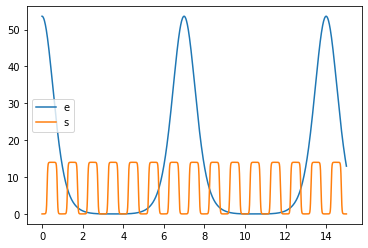

In [8]:
t = np.linspace(a, b, 1000)
plt.plot(t, e(t), label='e')
plt.plot(t, s(t), label='s')
plt.legend()
plt.show()

### Question III-2 : méthode des rectangles

Coder deux fonctions `RectangleGauche` et `RectangleDroite` calculant l'intégrale par la méthode des rectangles respectivement à gauche et à droite. Ces fonctions prendront en arguments les bornes $a$ et $b$ ainsi que le nombre d'intervalles $N$ (donc $N+1$ points d'évaluation !). Elles renverront la valeur approchée de l'intégrale.

In [9]:
def RectangleGauche(a, b, N):
    ft = f(np.linspace(a, b, N+1))
    return (b-a)*np.sum(ft[:-1])/N
def RectangleDroite(a, b, N):
    ft = f(np.linspace(a, b, N+1))
    return (b-a)*np.sum(ft[1:])/N
Igauche = RectangleGauche(a, b, 2**10)
Idroite = RectangleDroite(a, b, 2**10)
print("Rectangle à gauche: I =", Igauche, "  erreur =", np.abs(Igauche-Iref))
print("Rectangle à droite: I =", Idroite, "  erreur =", np.abs(Idroite-Iref))

Rectangle à gauche: I = 91.25224062728303   erreur = 0.29712292822091513
Rectangle à droite: I = 90.65685771494793   erreur = 0.298259984114182


### Question III-3 : méthode du point milieu

Coder une fonction `Milieu` calculant l'intégrale par la méthode du point milieu. Cette fonction prendra en arguments les bornes $a$ et $b$ ainsi que le nombre d'intervalles $N$ (donc $N+1$ points d'évaluation !). Elle renverra la valeur approchée de l'intégrale.

In [12]:
def Milieu(a, b, N):
    t = np.linspace(a, b, N+1)
    ft = f((t[:-1]+t[1:])/2)
    return (b-a)*np.sum(ft)/N
Imilieu = Milieu(a, b, 2**10)
print("Milieu: I =", Imilieu, "  erreur =", np.abs(Imilieu-Iref))

Milieu: I = 90.95540196187618   erreur = 0.0002842628140626857


### Question III-4 : méthode des trapèzes

Coder une fonction `Trapezes` calculant l'intégrale par la méthode des trapèzes. Cette fonction prendra en arguments les bornes $a$ et $b$ ainsi que le nombre d'intervalles $N$ (donc $N+1$ points d'évaluation !). Elle renverra la valeur approchée de l'intégrale.

In [13]:
def Trapezes(a, b, N):
    ft = f(np.linspace(a,b,N+1))
    return (b-a)*(np.sum(ft[1:-1])+(ft[0]+ft[-1])/2)/N
Itrapezes = Trapezes(a, b, 2**10)
print("Trapezes: I =", Itrapezes, "  erreur =", np.abs(Itrapezes-Iref))

Trapezes: I = 90.95454917111547   erreur = 0.0005685279466405291


### Question III-5 : analyse de l'erreur

Pour chacune des méthodes implémentées ci-dessus, calculer l'erreur entre l'intégrale approchée et la valeur qui vous est donnée $I_{ref}$. On calculera cette erreur pour différents nombres d'intervalles $N=2^4, 2^5, \ldots, 2^{15}$ et on affichera l'erreur en fonction du pas $h=\frac{b-a}{N}$ sur un même graphique pour chacune de ces méthodes.
Commenter le graphique obtenu.

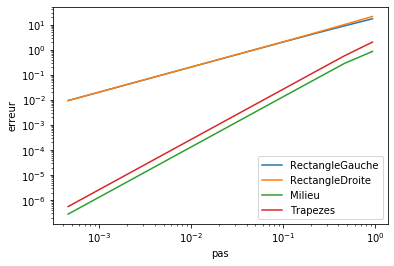

In [14]:
for method in [RectangleGauche, RectangleDroite, Milieu, Trapezes]:
    list_h = []
    list_err = []
    for k in range(4,16):
        N = 2**k
        h = (b-a)/N
        err = np.abs(method(a, b, N)-Iref)
        list_h.append(h)
        list_err.append(err)
    plt.loglog(list_h, list_err, label=method.__name__)
plt.legend()
plt.xlabel('pas')
plt.ylabel('erreur')
plt.show()

<font color='red'>
En tracant en echelle log/log, on voit bien des droites qui correspondent à l'ordre des méthodes. Les rectangles sont du même ordre (1) et le milieu/trapèzes sont d'ordre 2.
</font>

## Méthode de Romberg

La méthode de Romberg permet de calculer l'intégrale d'une fonction à l'aide d'approximations récursives de cette intégrale.
On rappelle que l'on souhaite calculer l'intégrale $I=\int_a^b f(t)\,\mathrm{d}t$.
Si on note $T(n)$ le résultat renvoyé par la méthode des trapèzes avec $n$ intervalles, la méthode consiste à :
- Déclarer un tableau $R$ de taille $(N+1)\times (N+1)$
- Initialiser
\begin{align*}
R(0,0) &= \frac{b-a}2 \left( f(a)+f(b) \right) \\
R(n,0) &= T(2^n)\quad\forall\, 1\leq n\leq N
\end{align*}
- Pour chaque $1\leq n\leq N$
    * Pour chaque $1\leq m\leq n$
\begin{align*}
R(n,m) &= \frac{1}{4^m-1}\left( 4^mR(n,m-1)-R(n-1,m-1) \right)
\end{align*}

Les éléments diagonaux de $R$ correspondent aux approximations successives de l'intégrale pour différents nombre de points.

### Question III-6

Coder une fonction `Romberg` qui réalise les opérations données au dessus et qui renvoie les $N+1$ éléments diagonaux de $R$. Cette fonction prendra en arguments les bornes $a$ et $b$ ainsi que $N$.
On évaluera cette fonction avec $N=15$.

In [15]:
def Romberg(a, b, N):
    R = np.zeros((N+1, N+1))
    R[0,0] = (b-a)*(f(a)+f(b))/2
    for n in range(N+1):
        R[n,0] = Trapezes(a, b, 2**n)
        for m in range(1, n+1):
            R[n,m] = (4**m*R[n,m-1]-R[n-1,m-1])/(4**m-1)
    return np.diag(R)
rom = Romberg(a, b, 15)
print(rom)

[499.12666583 387.40627428  47.44474831  39.19019111 100.16616162
  90.37076626  90.97016578  90.95497611  90.95511814  90.9551177
  90.9551177   90.9551177   90.9551177   90.9551177   90.9551177
  90.9551177 ]


### Question III-7 : calcul de l'erreur

Calculer l'erreur entre l'intégrale approchée $R(n,n)$ pour chaque $n\leq N$ et la valeur qui vous est donnée $I_{ref}$. On prendra $N=12$.
Afficher cette erreur en fonction du pas sachant que ce pas est donné par $h=\frac{b-a}{2^n}$.
Commenter le graphique obtenu et comparer à celui de la question 6.

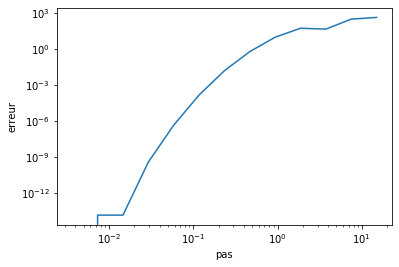

In [16]:
N = 12
Irom = Romberg(a, b, N)
k = np.arange(N+1)
N = 2**k
h = (b-a)/N
err = np.abs(Irom-Iref)
plt.loglog(h, err)
plt.xlabel('pas')
plt.ylabel('erreur')
plt.show()